In [726]:
#Library Imports
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
%matplotlib inline

In [1069]:
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 100, "display.max_columns", None)

<a class="anchor" id="toc"></a>
# Table of Content:

## [I. Gathering](#gathering)
## [II. Assessing](#assessing)  
## [III. Cleaning](#cleaning)
## [IV. Analyzing](#analyzing)
## [V. References](#references)

<a class="anchor" id="gathering"></a>
# I. Gathering

I. Data from 'twitter-archive-enhanced.csv' wil be loaded into a dataframe

In [9]:
tw_archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [1067]:
tw_archive_df.info()
tw_archive_df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Lin_Manuel: 11/10 would recommend. https://t.co/pnUF69K4xk,8.008540e+17,7.992370e+07,2016-11-22 00:10:52 +0000,"https://twitter.com/littlewiewel/status/800852955880628224,https://twitter.com/littlewiewel/status/800852955880628224",11,10,None,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1,https://twitter.com/dog_rates/status/864197398364647424/photo/1",13,10,Paisley,None,None,None,None
1003,747844099428986880,NaN,NaN,2016-06-28 17:28:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Huxley. He's pumped for #BarkWeek. Even has a hat. Ears are quite magical. 11/10 would remove hat to pat https://t.co/V7h5NMYbYz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747844099428986880/photo/1,11,10,Huxley,None,None,None,None
1441,696877980375769088,NaN,NaN,2016-02-09 02:07:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Misty. She's in a predicament. Not sure what next move should be. 9/10 stay calm pupper I'm comin https://t.co/XhR7PAgcwF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696877980375769088/photo/1,9,10,Misty,None,None,pupper,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flurpson. He can't believe it's not butter. 10/10 https://t.co/XD3ort1PsE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179681943552/photo/1,10,10,Flurpson,None,None,None,None
786,774757898236878852,NaN,NaN,2016-09-10 23:54:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Finley. She's a Beneboop Cumbersplash. 12/10 I'd do unspeakable things for Finley https://t.co/dS8SCbNF9P,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774757898236878852/photo/1,12,10,Finley,None,None,None,None
1316,706644897839910912,NaN,NaN,2016-03-07 00:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Shadow. She's tired of the responsibilities associated with being a dog. No longer strives to attain ball. 9/10 https://t.co/cdOkfEpjFw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706644897839910912/video/1,9,10,Shadow,None,None,None,None
1880,675006312288268288,NaN,NaN,2015-12-10 17:37:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Mollie. This pic was taken after she bet all her toys on Ronda Rousey. 10/10 hang in there pupper https://t.co/QMmAqA9VqO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675006312288268288/photo/1,10,10,Mollie,None,None,pupper,None
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1",12,10,Zeus,None,None,None,None
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a 

II. Read image prediction tsv file programatically

In [21]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
pred = requests.get(url)

folder = 'tweet-image-prediction'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(pred.content)
    
os.listdir(folder)

tw_img_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')

In [43]:
tw_img_df.info()
tw_img_df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


III. Reading tweet_json.txt line by line

In [1068]:
tw_json_df = pd.read_json('tweet_json.txt',lines = True)

In [179]:
tw_json_df.info()
tw_json_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
751,2016-09-22 16:13:51+00:00,778990705243029504,778990705243029504,This is Jay. He's really h*ckin happy about the start of fall. Sneaky tongue slip in 2nd pic. 11/10 snuggly af https://t.co/vyx1X5eyWI,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 778990686406402048, 'id_str': '778990686406402048', 'indices': [111, 134], 'media_url': 'http://pbs.twimg.com/media/Cs-H5uqXYAA7mHN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Cs-H5uqXYAA7mHN.jpg', 'url': 'https://t.co/vyx1X5eyWI', 'display_url': 'pic.twitter.com/vyx1X5eyWI', 'expanded_url': 'https://twitter.com/dog_rates/status/778990705243029504/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}","{'media': [{'id': 778990686406402048, 'id_str': '778990686406402048', 'indices': [111, 134], 'media_url': 'http://pbs.twimg.com/media/Cs-H5uqXYAA7mHN.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Cs-H5uqXYAA7mHN.jpg', 'url': 'https://t.co/vyx1X5eyWI', 'display_url': 'pic.twitter.com/vyx1X5eyWI', 'expanded_url': 'https://twitter.com/dog_rates/status/778990705243029504/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}, {'id': 778990686368591872, 'id_str': '778990686368591872', 'indices': [111, 134], 'media_url': 'http://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg', 'url': 'https://t.co/vyx1X5eyWI', 'display_url': 'pic.twitter.com/vyx1X5eyWI', 'expanded_url': 'https://twitter.com/dog_rates/status/778990705243029504/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 900, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1536, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200901, 'friends_count': 104, 'listed_count': 2789, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/86

In [178]:
tw_archive_df.info()
tw_archive_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1186,718540630683709445,NaN,NaN,2016-04-08 20:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Get you a pup that can do both. 10/10 https://t.co/zSbyvm62xZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/718540630683709445/photo/1,https://twitter.com/dog_rates/status/718540630683709445/photo/1",10,10,None,None,None,None,None
1912,674394782723014656,NaN,NaN,2015-12-09 01:07:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He's a hide and seek champion. Second only to Kony. 8/10 Gary has a gift https://t.co/cAlB4XCcsi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674394782723014656/photo/1,8,10,Gary,None,None,None,None
1667,682662431982772225,NaN,NaN,2015-12-31 20:39:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Joey and Izzy. Joey only has one ear that works and Izzy wants 2015 to be over already. Both great pups. 11/10s https://t.co/WgQTIQ93BB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682662431982772225/photo/1,11,10,Joey,None,None,None,None
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy https://t.co/pmarb2dG0e,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None
482,815390420867969024,NaN,NaN,2017-01-01 02:53:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy New Year from the squad! 13/10 for all https://t.co/9njRxyUd5L,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815390420867969024/photo/1,13,10,None,None,None,None,None


<a class="anchor" id="assessing"></a>
# II. Assessing



### Tidiness:
1. Merge columns:  
Example:  
**doggo,floofer,pupper,puppo** columns can all be merged into one column (dog stage)  
**p1,p2,p3** prediction algorithms to be combined into one  
2. Drop unnecessary columns:  
For exapmle, based on twitter schema definition (https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet) the following columns will not be necessarily useful in my analysis and can be dropped:**[in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls].** However, retweet and in_reply_to columns will be used to clean records of retweets before dropping the columns.
3. tw_archive_df, tw_img_df and tw_json_df  will be **merged** for ease of data access.

### Quality:

**I.tw_archive_df:**  
**1. Dog_Stage:** 
 1. Rows with **all none** in the dog stage should be dropped.  
 2. Rows with multiple dog stages should be dropped.  
**Reference:** Dogtionary definition of each state via the #WeRateDogs book on Amazon [Link](https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145 "optional title")  

**2. Name:** 
 3. Name column with incorrect values.  
(e.g. a, my, None ..etc.) should be cleaned. 
Assumption: Names should be starting a capital letter so names to inspect will be anything that doesn't qualify as well as None/NaN values.  
 4. Checking **rating_denominator** and **rating_numerator**.  
Begin by checking denominator more than 10 and analyzing the tweet text for them. 
 5. Exclude Retweets:  
   retweet columns will be used to clean records of retweets before dropping the columns.  
**Reference:** Twitter's data dictionary, Tweet object [Link](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet "optional title") 
   
**II.tw_img_df:**
   6. Remove predictions that are not dogs.  
Predictions with p1_dog, p2_dog and p3_dog **ALL** False should be analyzed and cleaned up accordingly.
   7. Merge predictions into a new column and clean it up

**III. tw_json_df:**
   8. Rename id to tweet_id.
   
[Table of Content](#toc)  

------------------------------------ 

## tw_archive_df

In [87]:
tw_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
668,790277117346975746,NaN,NaN,2016-10-23 19:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,None,None,None,None
454,818536468981415936,NaN,NaN,2017-01-09 19:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tom. He's a silly dog. Known for his u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818536468...,11,10,Tom,None,None,None,None
1099,735991953473572864,NaN,NaN,2016-05-27 00:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's curly af. Also rather f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735991953...,11,10,Maxaroni,None,None,None,None
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None


###  1. rows with all none in the dog stage should be dropped

In [101]:
tw_archive_df[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [108]:
no_dog_stage_df = tw_archive_df.query("doggo == 'None' and floofer == 'None' and pupper == 'None' and puppo == 'None'")
no_dog_stage_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,None,None,None,None
1118,732005617171337216,NaN,NaN,2016-05-16 00:31:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He has no self control. Tongue ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732005617...,11,10,Larry,None,None,None,None
1711,680497766108381184,NaN,NaN,2015-12-25 21:18:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Percy. He's a Latvian Yuletide Heineken. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680497766...,12,10,Percy,None,None,None,None
1062,741099773336379392,NaN,NaN,2016-06-10 02:48:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ted. He's given up. 11/10 relatable af...,NaN,NaN,NaN,https://vine.co/v/ixHYvdxUx1L,11,10,Ted,None,None,None,None
1435,697259378236399616,NaN,NaN,2016-02-10 03:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,8,10,getting,None,None,None,None
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Duke. He's an Urban Parmesan. They know h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None
267,841680585030541313,NaN,NaN,2017-03-14 16:01:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,None,None,None,None
1154,725458796924002305,NaN,NaN,2016-04-27 22:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pup had to be removed cuz it wouldn't have bee...,NaN,NaN,NaN,https://twitter.com/foxdeportes/status/7251360...,13,10,None,None,None,None,None
69,879050749262655488,NaN,NaN,2017-06-25 18:56:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879050749...,11,10,Steven,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None


### 2. Name column should be cleaned
* removing incorrect entries (e.g. a, my, None, ...etc.), since Names should be starting a capital letter so names to inspect will be anything that doesn't qualify as well as None/NaN values

In [84]:
tw_archive_df.name.describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

In [98]:
names_to_inspect = tw_archive_df[tw_archive_df['name'].str[0].str.islower()]
names_to_inspect['name']

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

### 4. Checking rating_denominator and rating_numerator
Begin by checking denominator more than 10 and analyzing the tweet text for them

In [139]:
print(tw_archive_df.loc[tw_archive_df['rating_denominator'] > 10].text)

342     @docmisterio account started on 11/15/15                                                                                                          
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                               
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…      
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                    
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ      
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                         
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds

- Based on the above couple of them can be manually fixed (e.g. 1068,1165,1202) since the rating comes after a first '/' is indicated which is considered as a rating when it's not

In [113]:
tw_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## tw_img_df

In [144]:
tw_img_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True
1385,766008592277377025,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,1,Welsh_springer_spaniel,0.728153,True,basset,0.103842,True,Brittany_spaniel,0.062414,True
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True


In [145]:
tw_img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 1. Remove predictions that are not dogs
- Predictions that are not dogs (p1_dog, p2_dog and p3_dog are all False)

In [157]:
no_dog = tw_img_df.query("p1_dog == False and p2_dog == False and p3_dog == False")
no_dog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


- some of the values above were actually true dog images that got dropped in the prediction algorithim but will drop them beacuse over incomplete data/prediction (either on img or archive dataframes)

### tw_json_df

In [173]:
tw_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

In [175]:
tw_json_df.sample()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1061,2016-06-10 00:39:48+00:00,741067306818797568,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,False,"[0, 67]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 741067297519869955, 'id_str': '741067297519869955', 'indices': [68, 91], 'media_url': 'http://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg', 'url': 'https://t.co/o5J479bZUC', 'display_url': 'pic.twitter.com/o5J479bZUC', 'expanded_url': 'https://twitter.com/dog_rates/status/741067306818797568/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'large': {'w': 576, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 576, 'h': 1024, 'resize': 'fit'}}}]}","{'media': [{'id': 741067297519869955, 'id_str': '741067297519869955', 'indices': [68, 91], 'media_url': 'http://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg', 'url': 'https://t.co/o5J479bZUC', 'display_url': 'pic.twitter.com/o5J479bZUC', 'expanded_url': 'https://twitter.com/dog_rates/status/741067306818797568/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'large': {'w': 576, 'h': 1024, 'resize': 'fit'}, 'medium': {'w': 576, 'h': 1024, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200943, 'friends_count': 104, 'listed_count': 2802, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",NaN,NaN,None,NaN,False,3520,10342,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a class="anchor" id="cleaning"></a>
## III. Cleaning
[Table of Content](#toc)

In [441]:
clean_arc = tw_archive_df.copy()
clean_img = tw_img_df.copy()
clean_twcount = tw_json_df.copy()

###### remove RT and replies keeping only originals

In [811]:
clean_arc = tw_archive_df.copy()
clean_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [814]:
#index = clean_arc[clean_arc['in_reply_to_status_id'].isna() == False].index
index = []

In [782]:
#clean_arc.drop(index,0, inplace = True)

In [813]:
clean_arc[clean_arc['in_reply_to_status_id'].isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [784]:
#clean_arc.sample(5)

In [815]:
index_rt = clean_arc[clean_arc['retweeted_status_id'].isna() == False].index
index_rt

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [816]:
clean_arc.drop(index_rt,0, inplace = True)

In [817]:
clean_arc[clean_arc['in_reply_to_status_id'].isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [818]:
clean_arc[clean_arc['retweeted_status_id'].isna() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [819]:
clean_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [790]:
clean_arc.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1562,688211956440801280,NaN,NaN,2016-01-16 04:11:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Derby. He's a superstar. 13/10 (vid by @NBohlmann) https://t.co/o4Nfc8WoAO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688211956440801280/video/1,13,10,Derby,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Hurley. He's the curly one. He hugs every other dog he sees during his walk. 11/10 for spreading the love https://t.co/M6vqkt2GKV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823135686656/photo/1,11,10,Hurley,None,None,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Apollo. He thought you weren't coming back so he had a mental breakdown. 8/10 we've all been there https://t.co/ojUBrDCHLT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835668455424/photo/1,8,10,Apollo,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Penny. Her tennis ball slowly rolled down her cone and into the pool. 8/10 bad things happen to good puppers https://t.co/YNWU7LeFgg,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/680583894916304897/photo/1,https://twitter.com/dog_rates/status/680583894916304897/photo/1,https://twitter.com/dog_rates/status/680583894916304897/photo/1,https://twitter.com/dog_rates/status/680583894916304897/photo/1",8,10,Penny,None,None,None,None


###### Removing incorrect names

In [820]:
names_to_inspect.index

Int64Index([  22,   56,  118,  169,  193,  335,  369,  542,  649,  682,
            ...
            2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64', length=109)

In [821]:
#clean_arc[index = names_to_inspect.index ]
#Filter_df  = df[df.index.isin(my_list)]
rows_to_drop = clean_arc[clean_arc.index.isin(names_to_inspect.index)].index
rows_to_drop

Int64Index([  22,   56,  169,  193,  335,  369,  542,  649,  801,  819,
            ...
            2335, 2345, 2346, 2347, 2348, 2349, 2350, 2352, 2353, 2354],
           dtype='int64', length=104)

In [822]:
clean_arc.drop(rows_to_drop,0, inplace = True)

In [823]:
clean_arc.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1042,743895849529389061,NaN,NaN,2016-06-17 19:59:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're given AUX cord privileges from the back seat and accidentally start blasting an audiobook... both 10/10 https://t.co/gCCrY8P0K9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743895849529389061/photo/1,10,10,None,None,None,None,None
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy New Year from your fav holiday squad! 🎉 12/10 for all\n\nHere's to a pupper-filled year 🍻🐶🐶🐶 https://t.co/ZSdEj59FGf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441537560576/photo/1,12,10,None,None,None,pupper,None
1572,687664829264453632,NaN,NaN,2016-01-14 15:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Opal. He's a Belgian Dijon Poofster. Upset because his hood makes him look like blond Justin Timberlake. 11/10 https://t.co/IAt3jRZ5ez,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687664829264453632/photo/1,11,10,Opal,None,None,None,None
1395,699801817392291840,NaN,NaN,2016-02-17 03:45:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/699801817392291840/photo/1,https://twitter.com/dog_rates/status/699801817392291840/photo/1,https://twitter.com/dog_rates/status/699801817392291840/photo/1,https://twitter.com/dog_rates/status/699801817392291840/photo/1",11,10,Cooper,None,None,pupper,None
2232,668221241640230912,NaN,NaN,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668221241640230912/photo/1,10,10,None,None,None,None,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Eli. He works backstage at Bone Jovi concerts. Heavy duty earmuffs for puptection. H*ckin safe boy. 11/10 https://t.co/cVQEnUQd8q,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835574547218894849/photo/1,https://twitter.com/dog_rates/status/835574547218894849/photo/1",11,10,Eli,None,None,None,None
960,751205363882532864,NaN,NaN,2016-07-08 00:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""This photographer took pics of her best friend before and after she told them they were beautiful"" 12/10 https://t.co/510gJW9fsy",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/751205363882532864/photo/1,https://twitter.com/dog_rates/status/751205363882532864/photo/1",12,10,None,None,None,None,None
1217,714962719905021952,NaN,NaN,2016-03-29 23:49:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Just in case anyone's having a bad day. 12/10 would bounce with https://t.co/T9sgP9ttnQ,NaN,NaN,NaN,https://vine.co/v/inVtemLt9tE,12,10,None,None,None,None,None
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062904504320/photo/1,8,10,Clarence,None,None,None,None
405,823939628516474880,NaN,NaN,2017-01-2

In [824]:
clean_arc[clean_arc['name'].str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###### clean None values

In [825]:
none_index = clean_arc[clean_arc['name']== 'None'].index

In [826]:
clean_arc.drop(none_index,0, inplace = True)

In [827]:
clean_arc.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1909,674422304705744896,NaN,NaN,2015-12-09 02:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ava. She doesn't understand flowers. 12/10 would caress firmly https://t.co/BxTJAFSIgk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674422304705744896/photo/1,12,10,Ava,None,None,None,None
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Rudy. He's going to be a star. 13/10 talented af (vid by @madalynrossi) https://t.co/Dph4FDGoMd,NaN,NaN,NaN,https://vine.co/v/irlDujgwOjd,13,10,Rudy,None,None,None,None
1133,728751179681943552,NaN,NaN,2016-05-07 00:59:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flurpson. He can't believe it's not butter. 10/10 https://t.co/XD3ort1PsE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728751179681943552/photo/1,10,10,Flurpson,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gerald. He's a fluffy lil yellow pup. Always looks like his favorite team just lost on a hail mary. 7/10 https://t.co/GpSkpN8kXS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638550134785/photo/1,7,10,Gerald,None,None,None,None
2203,668641109086707712,NaN,NaN,2015-11-23 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Hanz. He heard some thunder. 10/10 https://t.co/pKJK23j0QZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668641109086707712/photo/1,10,10,Hanz,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3,10,Wesley,None,None,None,None
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1",12,10,Louis,None,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/877316821321428993/photo/1,https://twitter.com/dog_rates/status/877316821321428993/photo/1",13,10,Dante,None,None,None,None
663,790946055508652032,NaN,NaN,2016-10-25 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Betty. She's assisting with the dishes. Such a good puppo. 12/10 h*ckin helpful af https://t.co/dgvTPZ9tgI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790946055508652032/photo/1,12,10,Betty,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Canela. She attempted some fancy porch pics. They were uns

#### Remove 'all none' categories
- I attempt this by concatanating all four stages and counting the substing 'None' and removing when all 4 categories have 'None'

In [276]:
#merge all categories into one string

In [829]:
clean_arc['cat'] = clean_arc['doggo'] + ' ' + clean_arc['floofer'] + ' ' + clean_arc['pupper'] + ' ' + clean_arc['puppo']

In [801]:
clean_arc.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cat
1746,679132435750195208,NaN,NaN,2015-12-22 02:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's a river dancer. His friends think it's badass. All are very supportive. 10/10 for Louis https://t.co/qoIvjKMY58,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679132435750195208/photo/1,10,10,Louis,None,None,None,None,None None None None
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Charlie. He's scholarly af. Quite intimidating with all his pupper knowledge 10/10 even built that fire https://t.co/9KThv6z8u5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681891461017812993/photo/1,10,10,Charlie,None,None,pupper,None,None None pupper None
1247,711652651650457602,NaN,NaN,2016-03-20 20:36:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gary. He just wanted to say hi. 9/10 very personable pup https://t.co/Sk3CbhmKSW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711652651650457602/photo/1,9,10,Gary,None,None,None,None,None None None None
1264,709918798883774466,NaN,NaN,2016-03-16 01:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Watson. He's a Suzuki Tickleboop. Leader of a notorious biker gang. Only one ear functional. 12/10 snuggable af https://t.co/R1gLc5vDqG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/709918798883774466/photo/1,https://twitter.com/dog_rates/status/709918798883774466/photo/1",12,10,Watson,None,None,None,None,None None None None
1906,674468880899788800,NaN,NaN,2015-12-09 06:01:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He thinks he's flying. 13/10 this is a legendary pup https://t.co/6d9WziPXmx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/674468880899788800/photo/1,https://twitter.com/dog_rates/status/674468880899788800/photo/1",13,10,Louis,None,None,None,None,None None None None
311,835297930240217089,NaN,NaN,2017-02-25 01:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Ash. He's a Benebop Cumberplop. Quite rare. Fairly portable. Lil sandy tho. Clearly knows something you don't. 12/10 would hug softly https://t.co/1U0z6r5LSO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930240217089/photo/1,12,10,Ash,None,None,None,None,None None None None
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oscar and Oliver. Oliver shrunk Oscar. Oscar isn't pleased about it. Quite pupset tbh. Oliver doesn't seem to mind. Both 13/10 https://t.co/e3U4NReleC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160327368704/photo/1,13,10,Oscar,None,None,None,None,None None None None
1026,746131877086527488,NaN,NaN,2016-06-24 00:04:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gustav. He has claimed that plant. It is his now. 10/10 would not try to take his plant away https://t.co/uRI7HBgGJX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746131877086527488/photo/1,10,10,Gustav,None,None,None,None,None None None None
1973,673213039743795200,NaN,NaN,2015-12-05 18:51:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dexter. He just got some big news. 10/10 https://t.co/CbvCUE6PFI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673213039743795200/photo/1,10,10,Dexter,None,None,None,None,None None None None
1715,680221482581123072,NaN,NaN,2015-12-25 

In [802]:
clean_arc['cat'][0].count('None')

4

In [834]:
index_cat = []
for index, row in clean_arc.iterrows():
        if row['cat'].count('None') == 4:
            index_cat.append(index)

In [835]:
index_cat

[0,
 1,
 2,
 3,
 4,
 6,
 8,
 10,
 11,
 13,
 15,
 16,
 17,
 18,
 20,
 21,
 23,
 26,
 27,
 28,
 31,
 33,
 34,
 38,
 39,
 40,
 44,
 45,
 48,
 50,
 51,
 52,
 53,
 54,
 57,
 58,
 60,
 61,
 63,
 65,
 66,
 67,
 69,
 70,
 75,
 76,
 77,
 79,
 80,
 81,
 84,
 85,
 86,
 87,
 90,
 102,
 104,
 105,
 106,
 111,
 114,
 115,
 116,
 117,
 119,
 120,
 122,
 123,
 126,
 128,
 134,
 136,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 147,
 150,
 151,
 152,
 153,
 156,
 158,
 161,
 162,
 163,
 166,
 167,
 173,
 174,
 175,
 176,
 178,
 181,
 183,
 187,
 196,
 197,
 198,
 201,
 203,
 205,
 206,
 207,
 208,
 209,
 210,
 214,
 215,
 216,
 217,
 219,
 223,
 225,
 227,
 229,
 232,
 233,
 235,
 236,
 237,
 239,
 242,
 244,
 252,
 253,
 254,
 255,
 257,
 258,
 259,
 261,
 262,
 263,
 264,
 265,
 267,
 270,
 271,
 276,
 278,
 279,
 280,
 282,
 284,
 287,
 288,
 292,
 294,
 295,
 296,
 299,
 301,
 305,
 308,
 311,
 312,
 316,
 317,
 320,
 321,
 322,
 324,
 325,
 326,
 328,
 329,
 333,
 336,
 337,
 338,
 347,
 348,
 350,


In [836]:
clean_arc.index

Int64Index([   0,    1,    2,    3,    4,    6,    8,    9,   10,   11,
            ...
            2303, 2308, 2309, 2312, 2313, 2315, 2317, 2318, 2319, 2325],
           dtype='int64', length=1391)

In [837]:
clean_arc[clean_arc.index.isin(index_cat)].sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cat
1764,678424312106393600,NaN,NaN,2015-12-20 03:58:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2,10,Crystal,None,None,None,None,None None None None
864,762464539388485633,NaN,NaN,2016-08-08 01:44:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Buddy. His father was a bear and his mother was a perfectly toasted marshmallow. 12/10 would snug so well https://t.co/zGSj1oUgxx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1,https://twitter.com/dog_rates/status/762464539388485633/photo/1",12,10,Buddy,None,None,None,None,None None None None
1771,678334497360859136,NaN,NaN,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rosie. She has a snazzy bow tie and a fin for a tail. Probably super fast underwater. Cool socks 10/10 https://t.co/GO76MdGBs0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678334497360859136/photo/1,10,10,Rosie,None,None,None,None,None None None None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1",12,10,Bo,None,None,None,None,None None None None
1257,710296729921429505,NaN,NaN,2016-03-17 02:48:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Oshie. 12/10 please enjoy (vid by @catherinec1389) https://t.co/VmtzwAuotq,NaN,NaN,NaN,https://vine.co/v/iw9hUFAMerV,12,10,Oshie,None,None,None,None,None None None None
1874,675135153782571009,NaN,NaN,2015-12-11 02:08:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Steven. He got locked outside. Damn it Steven. 5/10 nice grill tho https://t.co/zf7Sxxjfp3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675135153782571009/photo/1,5,10,Steven,None,None,None,None,None None None None
1135,728409960103686147,NaN,NaN,2016-05-06 02:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wallace. He's a skater pup. He said see ya later pup. Can easily do a kick flip. Gnarly af. 10/10 v petable https://t.co/5i8fORVKgr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728409960103686147/photo/1,10,10,Wallace,None,None,None,None,None None None None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Angel. She stole the @ShopWeRateDogs shirt from her owner. Fits pretty well actually. 11/10 would forgive https://t.co/jaivZ1dcUL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592277377025/photo/1,11,10,Angel,None,None,None,None,None None None None
1384,700796979434098688,NaN,NaN,2016-02-19 21:39:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Daniel. He's a neat pup. Exotic af. Custom paws. Leaps unannounced. Would totally pet. 7/10 daaamn Daniel https://t.co/5XaR0kj8cr,Na

#### drop rows with multiple dog categories = 'None'
- Using the same method I look for time where less than 3 'None' categories can be found which indicates more than one category is documented: 4 rows were found and dropped

In [838]:
clean_arc.drop(index_cat,0, inplace = True)

In [839]:
clean_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 9 to 2017
Data columns (total 18 columns):
tweet_id                      184 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     184 non-null object
source                        184 non-null object
text                          184 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 184 non-null object
rating_numerator              184 non-null int64
rating_denominator            184 non-null int64
name                          184 non-null object
doggo                         184 non-null object
floofer                       184 non-null object
pupper                        184 non-null object
puppo                         184 non-null object
cat                           184 non-null object
dty

In [840]:
clean_arc[clean_arc.index.isin([460,575,705,889])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,cat
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None,doggo None pupper None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None,doggo None pupper None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None,doggo None pupper None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None,doggo None pupper None


In [841]:
clean_arc.drop([460,575,705,889],0, inplace = True)

In [842]:
clean_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 9 to 2017
Data columns (total 18 columns):
tweet_id                      180 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     180 non-null object
source                        180 non-null object
text                          180 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 180 non-null object
rating_numerator              180 non-null int64
rating_denominator            180 non-null int64
name                          180 non-null object
doggo                         180 non-null object
floofer                       180 non-null object
pupper                        180 non-null object
puppo                         180 non-null object
cat                           180 non-null object
dty

In [843]:
index_cat = []
for index, row in clean_arc.iterrows():
        if row['cat'].count('None') != 3 :
            index_cat.append(index)

In [844]:
index_cat

[]

##### clean cat column and drop the seperate category columns

In [845]:
clean_arc['cat'] = clean_arc.cat.str.replace("None", "")
clean_arc['cat'] = clean_arc.cat.str.strip()
clean_arc.rename(columns={"cat": "dog_stage"},inplace=True)
clean_arc['dog_stage'] = clean_arc.dog_stage.str.capitalize()

In [846]:
clean_arc.dog_stage

9       Doggo  
14      Puppo  
29      Pupper 
43      Doggo  
46      Floofer
49      Pupper 
71      Puppo  
82      Pupper 
92      Pupper 
94      Puppo  
98      Pupper 
107     Pupper 
108     Doggo  
121     Doggo  
129     Puppo  
135     Pupper 
220     Pupper 
240     Doggo  
248     Doggo  
249     Pupper 
297     Pupper 
300     Doggo  
304     Pupper 
330     Pupper 
331     Doggo  
339     Doggo  
344     Doggo  
345     Doggo  
351     Doggo  
363     Doggo  
372     Doggo  
378     Pupper 
384     Doggo  
385     Doggo  
389     Doggo  
398     Puppo  
418     Pupper 
423     Doggo  
426     Doggo  
439     Puppo  
448     Doggo  
449     Doggo  
483     Pupper 
489     Doggo  
501     Doggo  
515     Pupper 
533     Pupper 
554     Puppo  
567     Puppo  
582     Floofer
587     Doggo  
631     Pupper 
643     Puppo  
663     Puppo  
672     Pupper 
689     Puppo  
698     Doggo  
713     Puppo  
724     Doggo  
727     Doggo  
731     Doggo  
763     Pupper 
772     

In [847]:
clean_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 9 to 2017
Data columns (total 18 columns):
tweet_id                      180 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     180 non-null object
source                        180 non-null object
text                          180 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 180 non-null object
rating_numerator              180 non-null int64
rating_denominator            180 non-null int64
name                          180 non-null object
doggo                         180 non-null object
floofer                       180 non-null object
pupper                        180 non-null object
puppo                         180 non-null object
dog_stage                     180 non-null object
dty

- Drop seperate category columns

In [848]:
clean_arc.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [849]:
clean_arc.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
1589,686683045143953408,2016-01-11 22:56:10 +0000,This is Mona. She's a Yarborough Splishnsplash. Lost body during Nam. 11/10 revolutionary pupper https://t.co/pgD6h0yhgz,11,10,Mona,Pupper
1177,719704490224398336,2016-04-12 01:51:36 +0000,This is Clyde. He's making sure you're having a good train ride. 12/10 great pupper https://t.co/y206kWHAj0,12,10,Clyde,Pupper
1817,676603393314578432,2015-12-15 03:23:14 +0000,This is Godzilla pupper. He had a ruff childhood &amp; now deflects that pain outward by terrorizing cities. Tragic 9/10 https://t.co/g1tLGkyaxr,9,10,Godzilla,Pupper
1571,687704180304273409,2016-01-14 18:33:48 +0000,Say hello to Blakely. He thinks that's a hat. Silly pupper. That's a nanner. 9/10 https://t.co/UwOV1jqKRt,9,10,Blakely,Pupper
1110,733822306246479872,2016-05-21 00:50:46 +0000,This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL,10,10,Moose,Floofer
1733,679777920601223168,2015-12-23 21:37:40 +0000,This is Rinna. She's melting. 10/10 get inside pupper https://t.co/PA0czwucsb,10,10,Rinna,Pupper
1395,699801817392291840,2016-02-17 03:45:29 +0000,This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02,11,10,Cooper,Pupper
1956,673612854080196609,2015-12-06 21:19:54 +0000,This is Jeffri. He's a speckled ice pupper. Very lazy. Enjoys the occasional swim. Rather majestic really. 7/10 https://t.co/0iyItbtkr8,7,10,Jeffri,Pupper
1970,673295268553605120,2015-12-06 00:17:55 +0000,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,8,10,Eve,Pupper
1441,696877980375769088,2016-02-09 02:07:12 +0000,This is Misty. She's in a predicament. Not sure what next move should be. 9/10 stay calm pupper I'm comin https://t.co/XhR7PAgcwF,9,10,Misty,Pupper


- Based on previous assessment, manually fix incorrect denominator, nuromerator. After cleaning up, none found

In [850]:
print(clean_arc.loc[clean_arc['rating_denominator'] > 10].text)

Series([], Name: text, dtype: object)


In [853]:
clean_arc.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
449,819004803107983360,2017-01-11 02:15:36 +0000,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,10,Bo,Doggo
951,751950017322246144,2016-07-10 01:23:49 +0000,This is Lola. She's a surfing pupper. 13/10 magical af https://t.co/BlGQkhM5EV,13,10,Lola,Pupper
1059,741743634094141440,2016-06-11 21:27:17 +0000,Meet Aqua. She's a sandy pupper. Not sure how she feels about being so sandy. Radical tongue slip. 11/10 petable af https://t.co/rYxJ0UQtbE,11,10,Aqua,Pupper
1355,703611486317502464,2016-02-27 16:03:45 +0000,Meet Scooter. He's experiencing the pupper equivalent of dropping ur phone in a toilet 10/10 put it in some rice pup https://t.co/JSmX1FIEaW,10,10,Scooter,Pupper
1197,717009362452090881,2016-04-04 15:22:08 +0000,This is Smokey. He's having some sort of existential crisis. 10/10 hang in there pupper https://t.co/JmgF4dMpw0,10,10,Smokey,Pupper
877,760893934457552897,2016-08-03 17:43:45 +0000,This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,11,10,Wishes,Doggo
772,776477788987613185,2016-09-15 17:48:25 +0000,This is Huck. He's addicted to caffeine. Hope it's not too latte to seek help. 11/10 stay strong pupper https://t.co/iJE3F0VozW,11,10,Huck,Pupper
966,750383411068534784,2016-07-05 17:38:41 +0000,This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,9,10,Zoe,Pupper
1478,693590843962331137,2016-01-31 00:25:18 +0000,Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,3,10,Phil,Pupper
1575,687476254459715584,2016-01-14 03:28:06 +0000,This is Curtis. He's a fluffball. 11/10 would snug this pupper https://t.co/1DzInODwrj,11,10,Curtis,Pupper


### Merge twitter archive with image prediction

In [878]:
clean_df = clean_arc.merge(clean_img, on = "tweet_id")

In [879]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 18 columns):
tweet_id              173 non-null int64
timestamp             173 non-null object
text                  173 non-null object
rating_numerator      173 non-null int64
rating_denominator    173 non-null int64
name                  173 non-null object
dog_stage             173 non-null object
jpg_url               173 non-null object
img_num               173 non-null int64
p1                    173 non-null object
p1_conf               173 non-null float64
p1_dog                173 non-null bool
p2                    173 non-null object
p2_conf               173 non-null float64
p2_dog                173 non-null bool
p3                    173 non-null object
p3_conf               173 non-null float64
p3_dog                173 non-null bool
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 22.1+ KB


In [856]:
clean_df.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
10,873213775632977920,2017-06-09 16:22:42 +0000,This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,12,10,Sierra,Pupper,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
49,800388270626521089,2016-11-20 17:20:08 +0000,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,12,10,Doc,Floofer,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
139,681654059175129088,2015-12-29 01:52:46 +0000,This is Toffee. He's a happy pupper. Appears dangerously fluffy. Extraordinarily spherical. 12/10 would pet firmly https://t.co/oEXEKt3MHu,12,10,Toffee,Pupper,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,1,Pomeranian,0.800538,True,chow,0.146892,True,Pekinese,0.037613,True
95,724004602748780546,2016-04-23 22:38:43 +0000,This is Luther. He saw a ghost. Spooked af. 11/10 hang in there pupper https://t.co/EdKG43VvEl,11,10,Luther,Pupper,https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg,3,Siamese_cat,0.950526,False,pug,0.018877,True,quilt,0.007628,False
11,871762521631449091,2017-06-05 16:15:56 +0000,This is Rover. As part of pupper protocol he had to at least attempt to eat the plant. Confirmed not tasty. Needs peanut butter. 12/10 https://t.co/AiVljI6QCg,12,10,Rover,Pupper,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
62,775364825476165632,2016-09-12 16:05:54 +0000,This is Finley. He's an independent doggo still adjusting to life on his own. 11/10 https://t.co/7FNcBaKbci,11,10,Finley,Doggo,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,True,Chihuahua,0.175257,True,Pembroke,0.034306,True
132,685169283572338688,2016-01-07 18:41:01 +0000,Meet Gerbald. He just found out he's adopted. Poor pupper. Snazzy tongue tho. 11/10 would hold close in time of need https://t.co/UfGkB9Wrud,11,10,Gerbald,Pupper,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
101,711008018775851008,2016-03-19 01:54:56 +0000,This is Chuckles. He had a balloon but he accidentally let go of it and it floated away. 11/10 hang in there pupper https://t.co/68iNM7B5gW,11,10,Chuckles,Pupper,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,1,French_bulldog,0.731405,True,Boston_bull,0.150672,True,pug,0.021811,True
38,821407182352777218,2017-01-17 17:21:47 +0000,This is Sundance. He's a doggo drummer. Even sings a bit on the side. 14/10 entertained af (vid by @sweetsundance) https://t.co/Xn5AQtiqzG,14,10,Sundance,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/821407155391725568/pu/img/AJC07gFJDDBuwNTD.jpg,1,Irish_setter,0.505496,True,vizsla,0.168747,True,Chesapeake_Bay_retriever,0.111311,True
108,701545186879471618,2016-02-21 23:13:01 +0000,Meet Millie. She's practicing her dive form for Rio. It's nearly perfect. Dedicated af. 10/10 go for gold pupper https://t.co/SDVkc4m96M,10,10,Millie,Pupper,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True


- By this stage I'm hoping some of the cleaning up issues identified in the assessment phase are resolved as the the image prediction df is merged into a smaller/cleaner dataset.

##### Check for all prediction as **NOT** dogs

In [880]:
no_dog = clean_df.query("p1_dog == False and p2_dog == False and p3_dog == False")
no_dog

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
22,836380477523124226,2017-02-28 01:00:19 +0000,"This is Ava. She just blasted off. Streamline af. Aerodynamic as h*ck. One small step for pupper, one giant leap for pupkind. 12/10 https://t.co/W4KffrdX3Q",12,10,Ava,Pupper,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
40,819006400881917954,2017-01-11 02:21:57 +0000,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,14,10,Sunny,Doggo,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
51,794205286408003585,2016-11-03 15:51:10 +0000,This is Laika. She was a space pupper. The first space pupper actually. Orbited earth like a h*ckin boss. 14/10 hero af https://t.co/trSjgY3h4g,14,10,Laika,Pupper,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
60,776113305656188928,2016-09-14 17:40:06 +0000,This is Sampson. He's about to get hit with a vicious draw 2. Has no idea. 11/10 poor pupper https://t.co/FYT9QBEnKG,11,10,Sampson,Pupper,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False
61,775733305207554048,2016-09-13 16:30:07 +0000,This is Anakin. He strives to reach his full doggo potential. Born with blurry tail tho. 11/10 would still pet well https://t.co/9CcBSxCXXG,11,10,Anakin,Doggo,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,long-horned_beetle,0.613852,False,ox,0.029473,False,rhinoceros_beetle,0.027806,False
66,768193404517830656,2016-08-23 21:09:14 +0000,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8,10,Gerald,Doggo,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,1,lion,0.396984,False,ram,0.300851,False,cheetah,0.094474,False
72,750506206503038976,2016-07-06 01:46:38 +0000,This is Malcolm. He's absolutely terrified of heights. 8/10 hang in there pupper https://t.co/SVU00Sc9U2,8,10,Malcolm,Pupper,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False
97,720340705894408192,2016-04-13 19:59:42 +0000,This is Derek. He just got balled on. Can't even get up. Poor thing. 10/10 hang in there pupper https://t.co/BIRRF3bcWH,10,10,Derek,Pupper,https://pbs.twimg.com/media/Cf8qDFbWwAEf8M3.jpg,1,alp,0.320126,False,lawn_mower,0.080808,False,viaduct,0.065321,False
98,719704490224398336,2016-04-12 01:51:36 +0000,This is Clyde. He's making sure you're having a good train ride. 12/10 great pupper https://t.co/y206kWHAj0,12,10,Clyde,Pupper,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,home_theater,0.059033,False,window_shade,0.038299,False,bathtub,0.035528,False
100,711968124745228288,2016-03-21 17:30:03 +0000,Meet Winston. He's trapped in a cup of coffee. Poor pupper. 10/10 someone free him https://t.co/2e6cUtKUuc,10,10,Winston,Pupper,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False


- This was not a big dataset to go through (26 records), I manually went over the images to cross check the validity of the prediction algorithm, 13 were not dogs (50%) and will be dropped manually using their indexs. As a **TO DO** will come back to see I can figure out a way to let python do this manual check for me.

In [881]:
not_dogs_index = [66,72,100,114,117,121,124,136,144,152,157,165,167]
clean_df.drop(not_dogs_index,0, inplace = True)

In [882]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 172
Data columns (total 18 columns):
tweet_id              160 non-null int64
timestamp             160 non-null object
text                  160 non-null object
rating_numerator      160 non-null int64
rating_denominator    160 non-null int64
name                  160 non-null object
dog_stage             160 non-null object
jpg_url               160 non-null object
img_num               160 non-null int64
p1                    160 non-null object
p1_conf               160 non-null float64
p1_dog                160 non-null bool
p2                    160 non-null object
p2_conf               160 non-null float64
p2_dog                160 non-null bool
p3                    160 non-null object
p3_conf               160 non-null float64
p3_dog                160 non-null bool
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 20.5+ KB


In [1060]:
dog_breed = []
dog_breed_2 = []
dog_breed_3 = []

for index, row in clean_df.iterrows():
        if row['p1_conf'] >= 0.5 and row['p1_dog']== True:
            dog_breed.append(index)
        elif row['p2_conf'] >= 0.5 and row['p2_dog']==True:
            dog_breed_2.append(index)
        elif row['p3_conf'] >= 0.5 and row['p3_dog']==True:
            dog_breed_3.append(index)
            

In [884]:
clean_df[~clean_df.index.isin(dog_breed)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
8,874296783580663808,2017-06-12 16:06:11 +0000,This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract https://t.co/0YplNnSMEm,13,10,Jed,Pupper,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,1,cocker_spaniel,0.437216,True,miniature_poodle,0.277191,True,toy_poodle,0.157402,True
18,845397057150107648,2017-03-24 22:08:59 +0000,"Say hello to Mimosa. She's an emotional support doggo who helps her owner with PTSD. 13/10, but she needs your help\n\nhttps://t.co/L6mLzrd7Mx https://t.co/jMutBFdw5o",13,10,Mimosa,Doggo,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True
21,836753516572119041,2017-03-01 01:42:39 +0000,This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a doggo anymore. 12/10 https://t.co/GZmNEdyoJY,12,10,Meera,Doggo,https://pbs.twimg.com/media/C5y-4VwWcAIcaoj.jpg,1,mortarboard,0.936882,False,academic_gown,0.020815,False,schipperke,0.011564,True
22,836380477523124226,2017-02-28 01:00:19 +0000,"This is Ava. She just blasted off. Streamline af. Aerodynamic as h*ck. One small step for pupper, one giant leap for pupkind. 12/10 https://t.co/W4KffrdX3Q",12,10,Ava,Pupper,https://pbs.twimg.com/media/C5trm6iWgAQ22Hw.jpg,1,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False
25,832273440279240704,2017-02-16 17:00:25 +0000,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,14,10,Smiley,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg,1,Pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True
27,831939777352105988,2017-02-15 18:54:34 +0000,This is Emanuel. He's a h*ckin rare doggo. Dwells in a semi-urban environment. Round features make him extra collectible. 12/10 would so pet https://t.co/k9bzgyVdUT,12,10,Emanuel,Doggo,https://pbs.twimg.com/media/C4uk0EWWQAAaZm1.jpg,1,Pomeranian,0.153862,True,marmot,0.091234,False,grey_fox,0.090644,False
30,828381636999917570,2017-02-05 23:15:47 +0000,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9,14,10,Doobert,Doggo,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,Bedlington_terrier,0.392535,True,Labrador_retriever,0.089022,True,clumber,0.081800,True
40,819006400881917954,2017-01-11 02:21:57 +0000,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,14,10,Sunny,Doggo,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
41,819004803107983360,2017-01-11 02:15:36 +0000,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,10,Bo,Doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
44,813096984823349248,2016-12-25 19:00:02 +0000,This is Rocky. He got triple-doggo-dared. Stuck af. 11/10 someone help him https://t.co/soNL00XWVu,11,10,Rocky,Doggo,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,Great_Dane,0.128056,True,Boston_bull,0.117003,True,kelpie,0.086964,True


In [885]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 172
Data columns (total 18 columns):
tweet_id              160 non-null int64
timestamp             160 non-null object
text                  160 non-null object
rating_numerator      160 non-null int64
rating_denominator    160 non-null int64
name                  160 non-null object
dog_stage             160 non-null object
jpg_url               160 non-null object
img_num               160 non-null int64
p1                    160 non-null object
p1_conf               160 non-null float64
p1_dog                160 non-null bool
p2                    160 non-null object
p2_conf               160 non-null float64
p2_dog                160 non-null bool
p3                    160 non-null object
p3_conf               160 non-null float64
p3_dog                160 non-null bool
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 20.5+ KB


In [886]:

clean_df = pd.melt(clean_df, id_vars = ['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','dog_stage','jpg_url', 'img_num', 'p1_conf', 'p1_dog',
       'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
               var_name = 'prediction_Alg',
               value_name = 'prediction_breed')



In [887]:
clean_df_final = clean_df.drop(['img_num','p1_conf','p1_dog','p2_conf','p2_dog','p3_conf','p3_dog'],axis=1)

In [888]:
clean_df_final.prediction_breed = clean_df_final.prediction_breed.str.replace("_"," ")
clean_df_final.prediction_breed = clean_df_final.prediction_breed.str.capitalize()
clean_df_final

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_Alg,prediction_breed
0,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,Doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,p1,Pembroke
1,889531135344209921,2017-07-24 17:02:04 +0000,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,13,10,Stuart,Puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,p1,Golden retriever
2,886366144734445568,2017-07-15 23:25:31 +0000,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox,12,10,Roscoe,Pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,p1,French bulldog
3,884162670584377345,2017-07-09 21:29:42 +0000,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,12,10,Yogi,Doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,p1,German shepherd
4,883360690899218434,2017-07-07 16:22:55 +0000,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,13,10,Grizzwald,Floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,p1,Chow
5,882762694511734784,2017-07-06 00:46:41 +0000,This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu,12,10,Gus,Pupper,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,p1,Labrador retriever
6,878776093423087618,2017-06-25 00:45:22 +0000,This is Snoopy. He's a proud #PrideMonthPuppo. Impeccable handwriting for not having thumbs. 13/10 would love back #PrideMonth https://t.co/lNZwgNO4gS,13,10,Snoopy,Puppo,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,p1,Italian greyhound
7,876838120628539392,2017-06-19 16:24:33 +0000,This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6,12,10,Ginger,Pupper,https://pbs.twimg.com/media/DCsnnZsVwAEfkyi.jpg,p1,Bloodhound
8,874296783580663808,2017-06-12 16:06:11 +0000,This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract https://t.co/0YplNnSMEm,13,10,Jed,Pupper,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,p1,Cocker spaniel
9,874012996292530176,2017-06-11 21:18:31 +0000,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V",13,10,Sebastian,Puppo,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,p1,Cardigan


In [889]:

#df.column_name = df.column_name.astype(str)
clean_df_final.prediction_breed = clean_df_final.prediction_breed.astype(str)
clean_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
tweet_id              480 non-null int64
timestamp             480 non-null object
text                  480 non-null object
rating_numerator      480 non-null int64
rating_denominator    480 non-null int64
name                  480 non-null object
dog_stage             480 non-null object
jpg_url               480 non-null object
prediction_Alg        480 non-null object
prediction_breed      480 non-null object
dtypes: int64(3), object(7)
memory usage: 37.6+ KB


In [890]:
no_dog_prediction = ['Brass','Hog','Black widow','Crate','Ox','Arabian camel','Dishwasher','Mortarboard','Ice lolly','Bobsled','Wooden spoon',"Jack-o'-lantern",'Teddy','Joystick','Vacuum','Wok','Prison','Palace','Paddlewheel']
no_dog_pred_index = clean_df_final[clean_df_final['prediction_breed'].isin(no_dog_prediction)].index
#df[df['A'] in list_of_values]

In [891]:
#iteration 1
clean_df_final.drop(no_dog_pred_index,0, inplace = True)

In [892]:
clean_df_final.prediction_breed.value_counts()

Golden retriever                  21
Labrador retriever                20
Chihuahua                         12
French bulldog                    12
Pembroke                          12
Pug                               11
Kelpie                            10
Cocker spaniel                    10
Chow                              9 
Chesapeake bay retriever          9 
Malamute                          8 
Eskimo dog                        8 
Shetland sheepdog                 8 
Pomeranian                        7 
German shepherd                   7 
Toy poodle                        7 
Norwegian elkhound                7 
Siberian husky                    7 
Boxer                             6 
Bull mastiff                      6 
Boston bull                       6 
Cardigan                          6 
Collie                            6 
Siamese cat                       5 
Tibetan terrier                   5 
Staffordshire bullterrier         5 
American staffordshire terrier    5 
M

In [893]:
no_dog_prediction = ['Three-toed sloth','Bow','Academic gown','Sombrero','Barrow','Marmot','Consomme','Toilet seat','Window shade','Shopping cart','Badger','Swab','Lawn mower','Gibbon','Wombat','Paintbrush','Pedestal','Long-horned beetle','Shovel','Mousetrap','Home theatre','Seat belt','Fur coat','Ice bear','Sorrel','Neck brace','Fountain','Umbrella','Alp','Mashed potato','Ski mask','Motor scooter','Grey fox','Buckeye','Carton','Moped','Guinea pig','Sandbar','Cup','Horse cart','Spatula','Grand piano','Rhinoceros beetle','Quill','Viaduct','Car mirror','Giant panda','Quilt','Bathtub','Muzzle','Tennis ball','Tub','Feather boa','Newfoundland','Appenzeller','Washbasin','Sliding door','Space heater','Doormat','Siamese cat']

In [894]:
no_dog_pred_index = clean_df_final[clean_df_final['prediction_breed'].isin(no_dog_prediction)].index
#iteration 2
clean_df_final.drop(no_dog_pred_index,0, inplace = True)

In [713]:
clean_df_final.prediction.value_counts()

Golden retriever                  21
Labrador retriever                20
French bulldog                    12
Chihuahua                         12
Pembroke                          12
Pug                               11
Kelpie                            10
Cocker spaniel                    10
Chesapeake bay retriever          9 
Chow                              9 
Eskimo dog                        8 
Malamute                          8 
Shetland sheepdog                 8 
Norwegian elkhound                7 
German shepherd                   7 
Siberian husky                    7 
Toy poodle                        7 
Pomeranian                        7 
Bull mastiff                      6 
Boston bull                       6 
Collie                            6 
Boxer                             6 
Cardigan                          6 
Miniature pinscher                5 
American staffordshire terrier    5 
Tibetan terrier                   5 
Bloodhound                        5 
S

In [895]:
clean_df_final.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_Alg,prediction_breed
293,680473011644985345,2015-12-25 19:39:43 +0000,"This is Hector. He thinks he's a hammer. Silly Hector. You're a pupper, not a hammer. 10/10 https://t.co/OdUFuZIXiI",10,10,Hector,Pupper,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,p2,West highland white terrier
126,683481228088049664,2016-01-03 02:53:17 +0000,Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq,11,10,Banjo,Pupper,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,p1,Keeshond
238,743253157753532416,2016-06-16 01:25:36 +0000,"This is Kilo. He cannot reach the snackum. Nifty tongue, but not nifty enough. 10/10 maybe one day puppo https://t.co/gSmp31Zrsx",10,10,Kilo,Puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,p2,Siberian husky
15,866450705531457537,2017-05-22 00:28:40 +0000,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,10,Jamesy,Pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,p1,French bulldog
356,822462944365645825,2017-01-20 15:17:01 +0000,"This is Gabe. He was the unequivocal embodiment of a dream meme, but also one h*ck of a pupper. You will be missed by so many. 14/10 RIP https://t.co/M3hZGadUuO",14,10,Gabe,Pupper,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,p3,Maltese dog
101,705428427625635840,2016-03-03 16:23:38 +0000,This is Ambrose. He's an Alfalfa Ballyhoo. Draws pistol fast af. Pretty much runs the frontier. 11/10 lethal pupper https://t.co/ih6epBOxIA,11,10,Ambrose,Pupper,https://pbs.twimg.com/media/CcovaMUXIAApFDl.jpg,p1,Chihuahua
476,672481316919734272,2015-12-03 18:23:34 +0000,Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,12,10,Jazz,Pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,p3,Shetland sheepdog
460,675006312288268288,2015-12-10 17:37:00 +0000,Say hello to Mollie. This pic was taken after she bet all her toys on Ronda Rousey. 10/10 hang in there pupper https://t.co/QMmAqA9VqO,10,10,Mollie,Pupper,https://pbs.twimg.com/media/CV4aqCwWsAIi3OP.jpg,p3,Beagle
411,725786712245440512,2016-04-28 20:40:11 +0000,Say hello to Lillie. She's a Rutabagan Floofem. Poor pupper ate and then passed out. 11/10 relatable af https://t.co/uIdGqug9rw,11,10,Lillie,Pupper,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,p3,Kuvasz
43,813910438903693312,2016-12-28 00:52:25 +0000,This is Chubbs. He dug a hole and now he's stuck in it. Dang h*ckin doggo. 11/10 would assist https://t.co/z1VRj1cYZf,11,10,Chubbs,Doggo,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,p1,Siberian husky


### clean_twcount

In [898]:
clean_twcount.info()
clean_twcount.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id          2354 non-null int64
full_text         2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
favorited         2354 non-null bool
retweeted         2354 non-null bool
dtypes: bool(2), int64(3), object(1)
memory usage: 78.3+ KB


Index(['tweet_id', 'full_text', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted'],
      dtype='object')

- Drop unneeded columns

In [900]:
clean_twcount.drop(['created_at','id_str', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status',
       'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],axis=1,inplace=True)

'"clean_twcount.drop([\'created_at\',\'id_str\', \'truncated\',\n       \'display_text_range\', \'entities\', \'extended_entities\', \'source\',\n       \'in_reply_to_status_id\', \'in_reply_to_status_id_str\',\n       \'in_reply_to_user_id\', \'in_reply_to_user_id_str\',\n       \'in_reply_to_screen_name\', \'user\', \'geo\', \'coordinates\', \'place\',\n       \'contributors\', \'is_quote_status\',\n       \'possibly_sensitive\',\n       \'possibly_sensitive_appealable\', \'lang\', \'retweeted_status\',\n       \'quoted_status_id\', \'quoted_status_id_str\', \'quoted_status\'],axis=1,inplace=True)\n       '

- rename id to tweet_id

In [692]:
clean_twcount.rename(columns = {'id':'tweet_id'},inplace=True)


In [901]:
clean_twcount.sample(10)

,tweet_id,full_text,retweet_count,favorite_count,favorited,retweeted
102,872486979161796608,We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ,9429,41606,False,False
847,766008592277377025,This is Angel. She stole the @ShopWeRateDogs shirt from her owner. Fits pretty well actually. 11/10 would forgive https://t.co/jaivZ1dcUL,571,4149,False,False
896,758854675097526272,"This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW",1027,3904,False,False
2257,667550904950915073,"RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",37,0,False,False
1012,747204161125646336,This is Clark. He's deadly af. Clearly part shark (see pic 2). 10/10 would totally still try to pet https://t.co/dmdEBOEctC,1038,3722,False,False
487,813944609378369540,RT @dog_rates: This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7,3732,0,False,False
866,761750502866649088,"RT @dog_rates: ""Tristan do not speak to me with that kind of tone or I will take away the Xbox."" 10/10 https://t.co/VGPH0TfESw",4535,0,False,False
797,772877495989305348,You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,4501,9555,False,False
975,750011400160841729,Meet Piper. She's an airport doggo. Please return your tray table to its full pupright and locked position. 11/10 https://t.co/D17IAcetmM,1035,3568,False,False
750,779056095788752897,Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5,5247,16500,False,False


- merge clean_twcount with clean_df_final on tweet_id

In [902]:
clean_df_final = clean_df_final.merge(clean_twcount, on = "tweet_id")

In [904]:
clean_df_final.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_Alg,prediction_breed,full_text,retweet_count,favorite_count,favorited,retweeted
160,773547596996571136,2016-09-07 15:44:53 +0000,This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb,11,10,Chelsea,Pupper,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,p3,Malamute,This is Chelsea. She forgot how to dog. 11/10 get it together pupper https://t.co/nBJ5RE4yHb,7126,24553,False,False
71,831322785565769729,2017-02-14 02:02:51 +0000,This is Pete. He has no eyes. Needs a guide doggo. Also appears to be considerably fluffy af. 12/10 would hug softly https://t.co/Xc0gyovCtK,12,10,Pete,Doggo,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,p1,Old english sheepdog,This is Pete. He has no eyes. Needs a guide doggo. Also appears to be considerably fluffy af. 12/10 would hug softly https://t.co/Xc0gyovCtK,1744,10042,False,False
179,750383411068534784,2016-07-05 17:38:41 +0000,This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,9,10,Zoe,Pupper,https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg,p2,Collie,This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,1309,5005,False,False
45,850019790995546112,2017-04-06 16:18:05 +0000,Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,12,10,Boomer,Pupper,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,p1,Shetland sheepdog,Say hello to Boomer. He's a sandy pupper. Having a h*ckin blast. 12/10 would pet passionately https://t.co/ecb3LvExde,5459,21944,False,False
259,689623661272240129,2016-01-20 01:41:08 +0000,This is Lucy. She's terrified of the stuffed billed dog. 10/10 stay strong pupper https://t.co/QnvSjjyh7n,10,10,Lucy,Pupper,https://pbs.twimg.com/media/CZIJD2SWIAMJgNI.jpg,p3,Labrador retriever,This is Lucy. She's terrified of the stuffed billed dog. 10/10 stay strong pupper https://t.co/QnvSjjyh7n,748,2467,False,False
342,673295268553605120,2015-12-06 00:17:55 +0000,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,8,10,Eve,Pupper,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,p1,Golden retriever,Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg,3484,8046,False,False
67,832032802820481025,2017-02-16 01:04:13 +0000,This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M,12,10,Miguel,Doggo,https://pbs.twimg.com/media/C4v5a4UWcAIRygc.jpg,p1,Whippet,This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M,4746,13887,False,False
354,672481316919734272,2015-12-03 18:23:34 +0000,Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,12,10,Jazz,Pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,p1,Border collie,Say hello to Jazz. She should be on the cover of Vogue. 12/10 gorgeous pupper https://t.co/mVCMemhXAP,137,757,False,False
312,679777920601223168,2015-12-23 21:37:40 +0000,This is Rinna. She's melting. 10/10 get inside pupper https://t.co/PA0czwucsb,10,10,Rinna,Pupper,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,p2,Bull mastiff,This is Rinna. She's melting. 10/10 get inside pupper https://t.co/PA0czwucsb,1281,3390,False,False
347,672988786805112832,2015-12-05 04:00:04 +0000,This is Schnozz. He's had a blurred tail since birth. Hasn't let that stop him. 10/10 inspirational pupper https://t.co/a3zYMcvbXG,10,10,Schnozz,Pupper,https://pbs.twimg.com/media/CVbvjKqW4AA_CuD.jpg,p3,Wire-haired fox terrier,T

- dropping favorited and retweeted

In [905]:
clean_df_final.drop(['favorited','retweeted','full_text'],axis=1,inplace=True)

In [721]:
#clean up names and remove prediction_number

In [906]:
clean_df_final.drop(['prediction_Alg'],axis=1,inplace=True)
clean_df_final.rename(columns = {'prediction_breed':'dog_breed', 'name':'dog_name'},inplace=True)

In [1061]:
clean_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 384
Data columns (total 11 columns):
tweet_id              385 non-null int64
timestamp             385 non-null object
text                  385 non-null object
rating_numerator      385 non-null int64
rating_denominator    385 non-null int64
dog_name              385 non-null object
dog_stage             385 non-null object
jpg_url               385 non-null object
dog_breed             385 non-null object
retweet_count         385 non-null int64
favorite_count        385 non-null int64
dtypes: int64(5), object(6)
memory usage: 46.1+ KB


## Store
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

In [1062]:
clean_df_final.to_csv('twitter_archive_master.csv', index=False)

<a class="anchor" id="analyzing"></a>
## IV. Analyzing
[Table of Content](#toc)

In [908]:
clean_df_final.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,dog_breed,retweet_count,favorite_count
132,799757965289017345,2016-11-18 23:35:32 +0000,This is Sobe. She's a h*ckin happy doggo. Only one leg tho. Must have good balance. 13/10 would smile back https://t.co/OiH8PaOxB1,13,10,Sobe,Doggo,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,Border collie,2506,9390
28,874012996292530176,2017-06-11 21:18:31 +0000,"This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V",13,10,Sebastian,Puppo,https://pbs.twimg.com/media/DCEeLxjXsAAvNSM.jpg,Kelpie,11007,35501
241,701545186879471618,2016-02-21 23:13:01 +0000,Meet Millie. She's practicing her dive form for Rio. It's nearly perfect. Dedicated af. 10/10 go for gold pupper https://t.co/SDVkc4m96M,10,10,Millie,Pupper,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,Cardigan,680,2902
79,827933404142436356,2017-02-04 17:34:40 +0000,This is Kona. Yesterday she stopped by the department to see what it takes to be a police pupper. 12/10 vest was only a smidge too big https://t.co/j8D3PQJvpJ,12,10,Kona,Pupper,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,German shepherd,5987,22180
283,685169283572338688,2016-01-07 18:41:01 +0000,Meet Gerbald. He just found out he's adopted. Poor pupper. Snazzy tongue tho. 11/10 would hold close in time of need https://t.co/UfGkB9Wrud,11,10,Gerbald,Pupper,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,Bernese mountain dog,1620,4489
295,681891461017812993,2015-12-29 17:36:07 +0000,Say hello to Charlie. He's scholarly af. Quite intimidating with all his pupper knowledge 10/10 even built that fire https://t.co/9KThv6z8u5,10,10,Charlie,Pupper,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,Toy terrier,951,2706
224,717009362452090881,2016-04-04 15:22:08 +0000,This is Smokey. He's having some sort of existential crisis. 10/10 hang in there pupper https://t.co/JmgF4dMpw0,10,10,Smokey,Pupper,https://pbs.twimg.com/media/CfNUNetW8AAekHx.jpg,Eskimo dog,1102,3583
227,711008018775851008,2016-03-19 01:54:56 +0000,This is Chuckles. He had a balloon but he accidentally let go of it and it floated away. 11/10 hang in there pupper https://t.co/68iNM7B5gW,11,10,Chuckles,Pupper,https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg,Boston bull,710,3275
25,874296783580663808,2017-06-12 16:06:11 +0000,This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract https://t.co/0YplNnSMEm,13,10,Jed,Pupper,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,Toy poodle,4308,26651
152,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie,Pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,Lhasa,1885,7320


### 1. Dog Name:
Some fun questions to ask:
- Most tweeted dog names
- Favorite dog names
- Names most RT'd
- Most popular Ratings

In [1023]:
clean_df_final.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_name,dog_stage,jpg_url,dog_breed,retweet_count,favorite_count
205,735137028879360001,2016-05-24 15:55:00 +0000,Meet Buckley. His family &amp; some neighbors came over to watch him perform but he's nervous af. 9/10 u got this pupper https://t.co/5bdCpPlno9,9,10,Buckley,Pupper,https://pbs.twimg.com/media/CjO7OfeWgAAUQy-.jpg,Walker hound,1092,3428
250,694329668942569472,2016-02-02 01:21:07 +0000,Meet Grady. He's very hungry. Too bad no one can find his food bowl. 9/10 poor pupper https://t.co/oToIkYnEGn,9,10,Grady,Pupper,https://pbs.twimg.com/media/CaLBJmOWYAQt44t.jpg,Bull mastiff,569,2203
358,672254177670729728,2015-12-03 03:21:00 +0000,This is Rolf. He's having the time of his life. 11/10 good pupper https://t.co/OO6MqEbqG3,11,10,Rolf,Pupper,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,French bulldog,800,1515
293,683111407806746624,2016-01-02 02:23:45 +0000,This is Larry. He thought the New Year's parties were tonight. 10/10 poor pupper. Maybe next year https://t.co/h3X0jK8MVM,10,10,Larry,Pupper,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,Miniature schnauzer,1034,3736
54,845306882940190720,2017-03-24 16:10:40 +0000,This is Pickles. She's a silly pupper. Thinks she's a dish. 12/10 would dry https://t.co/7mPCF4ZwEk,12,10,Pickles,Pupper,https://pbs.twimg.com/media/C7siH5DXkAACnDT.jpg,Irish water spaniel,6039,25225


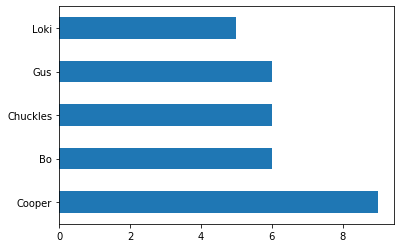

In [914]:
#top five tweeted dog names
clean_df_final['dog_name'].value_counts()[:5].plot(kind='barh')

### Most popular ratings

Text(0.5, 1.0, 'Ratings (out of 10) counts')

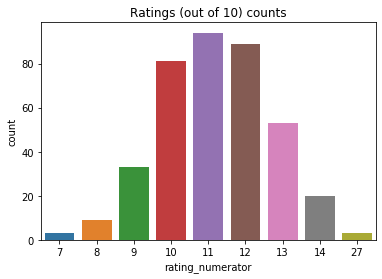

In [910]:
#plotting with seaborn
sns.countplot(x='rating_numerator', data=clean_df_final)
plt.title('Ratings (out of 10) counts')


## Dog Stages

- Dog stages most retweeted
- Dog stages most favorited
- Is there a correlation between dog breed and average number of RTs and favorites

Text(0.5, 1.0, 'Dog Stages most Retweeted')

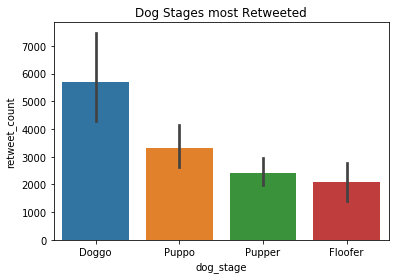

In [1027]:
sns.barplot(x='dog_stage',y='retweet_count', data=clean_df_final)
plt.title('Dog Stages most Retweeted')

Text(0.5, 1.0, 'Dog Stages most Favorited')

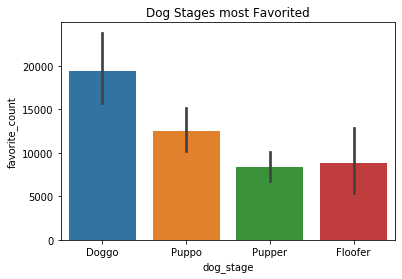

In [1045]:
sns.barplot(x='dog_stage',y='favorite_count', data=clean_df_final)
plt.title('Dog Stages most Favorited')

In [1046]:
df3

,dog_stage,retweet_count,favorite_count
105,Doggo,42228,95450
106,Doggo,42228,95450
107,Doggo,42228,95450
42,Pupper,32883,106827
43,Pupper,32883,106827
44,Pupper,32883,106827
93,Pupper,17209,31800
94,Pupper,17209,31800
95,Pupper,17209,31800
48,Doggo,13076,48410


- Is there a correlation between dog breed and average number of RTs and favorites ?

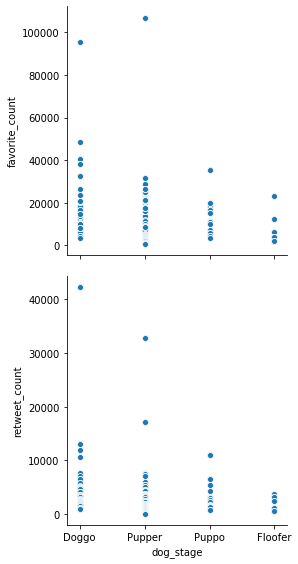

In [1064]:
sns.pairplot(
    df3,
    x_vars=['dog_stage'],
    y_vars=['favorite_count','retweet_count'],height=4,
)

- **Doggo** is correlated with a high RT and Favorite counts

## Dog Name

- Top 20 names to get Retweets
- Top 20 names to get Favorites


In [1049]:
df1 = clean_df_final.groupby(['dog_name']).retweet_count.mean()
df1 = df1.to_frame()
df1.reset_index(level=0, inplace=True)
df1.sort_values(by=['retweet_count'],ascending=False,inplace=True)
df1.rename(columns={'retweet_count':'Average Retweet Count','dog_name':'Dog Name'},inplace=True)


Text(0.5, 1.0, 'Top 20 Names to get Retweets')

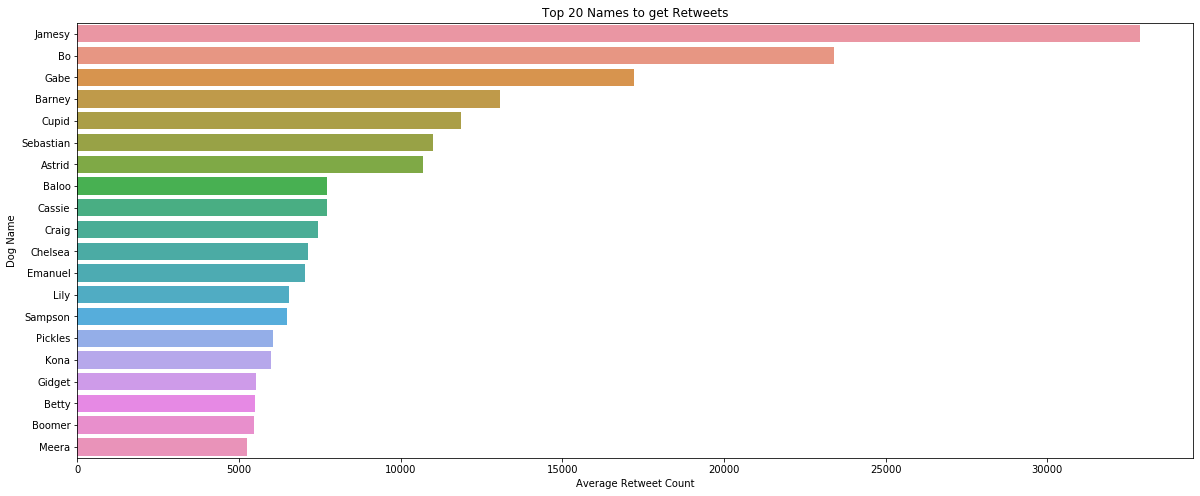

In [1070]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Dog Name',x='Average Retweet Count',data=df1.head(20))
plt.title('Top 20 Names to get Retweets')

In [1015]:
df2 = clean_df_final.groupby(['dog_name']).favorite_count.mean()
df2 = df2.to_frame()
df2.reset_index(level=0, inplace=True)
df2.sort_values(by=['favorite_count'],ascending=False,inplace=True)
df2.rename(columns={'favorite_count':'Average Favorite Count','dog_name':'Dog Name'},inplace=True)
df2.columns

Index(['Dog Name', 'Average Favorite Count'], dtype='object')

Text(0.5, 1.0, 'Top 20 Names to get Favorites')

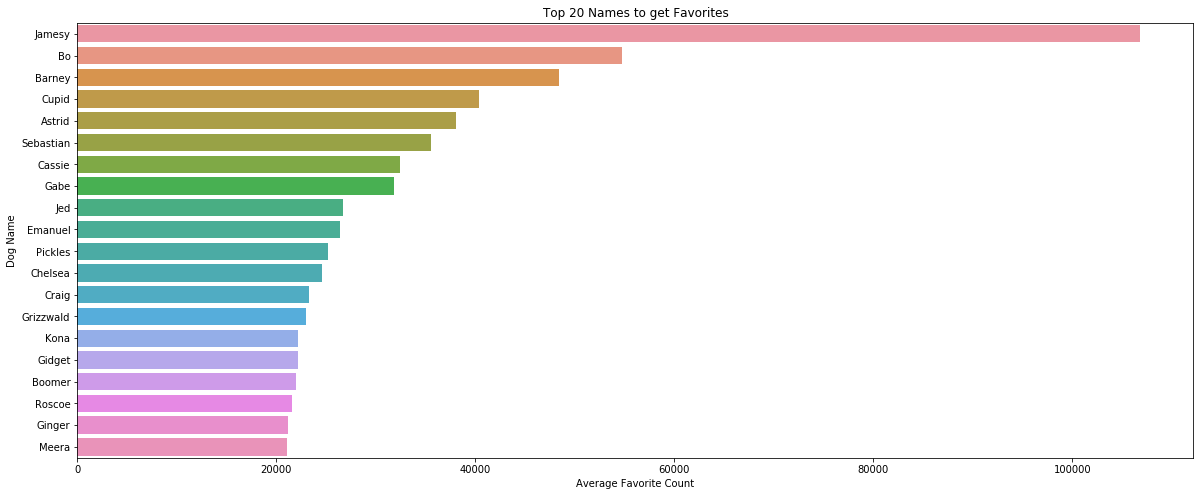

In [1071]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Dog Name',x='Average Favorite Count',data=df2.head(20))
plt.title('Top 20 Names to get Favorites')

- **Jamesy** seems to be an all time favoite name!

In [1019]:
df4= df1.merge(df2,on="Dog Name")

In [1056]:
df4

,Dog Name,Average Retweet Count,Average Favorite Count
0,Jamesy,32883.000000,106827.000000
1,Bo,23404.500000,54730.000000
2,Gabe,17209.000000,31800.000000
3,Barney,13076.000000,48410.000000
4,Cupid,11878.000000,40325.000000
5,Sebastian,11007.000000,35501.000000
6,Astrid,10706.000000,38074.000000
7,Baloo,7724.000000,19881.000000
8,Cassie,7711.000000,32467.000000
9,Craig,7444.000000,23302.000000


## Dog Breed
- Top 20 breeds to get Retweets
- Top 20 breeds to get Favorites

In [1055]:
clean_df_final.dog_breed.value_counts().head(20)

Golden retriever            21
Labrador retriever          20
Pembroke                    12
French bulldog              12
Chihuahua                   12
Pug                         11
Cocker spaniel              10
Kelpie                      10
Chesapeake bay retriever    9 
Chow                        9 
Malamute                    8 
Eskimo dog                  8 
Shetland sheepdog           8 
German shepherd             7 
Pomeranian                  7 
Toy poodle                  7 
Siberian husky              7 
Norwegian elkhound          7 
Cardigan                    6 
Bull mastiff                6 
Name: dog_breed, dtype: int64

In [1053]:
df5 = clean_df_final.groupby(['dog_breed']).favorite_count.mean()
df5 = df5.to_frame()
df5.reset_index(level=0, inplace=True)
df5.sort_values(by=['favorite_count'],ascending=False,inplace=True)
df5.rename(columns={'favorite_count':'Average Favorite Count','dog_breed':'Dog Breed'},inplace=True)
df5.columns

Index(['Dog Breed', 'Average Favorite Count'], dtype='object')

In [1054]:
df5

,Dog Breed,Average Favorite Count
86,Standard poodle,95450.000000
64,Norfolk terrier,48410.000000
25,Curly-coated retriever,25225.000000
47,Irish water spaniel,25225.000000
12,Boston bull,24894.166667
88,Tibetan terrier,23180.000000
89,Toy poodle,21743.714286
87,Tibetan mastiff,21641.500000
51,Komondor,20730.000000
18,Cardigan,20089.000000


Text(0.5, 1.0, 'Top 20 Breeds to get Favorites')

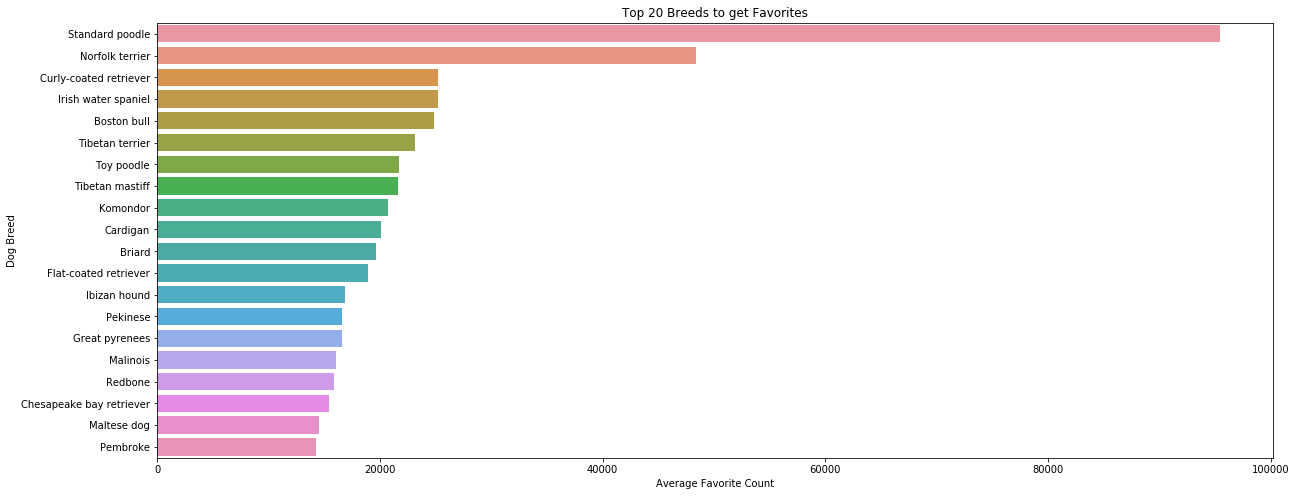

In [1057]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Dog Breed',x='Average Favorite Count',data=df5.head(20))
plt.title('Top 20 Breeds to get Favorites')

**Standard Poodle** is by far the top breed to get favorites

In [1058]:
df6 = clean_df_final.groupby(['dog_breed']).retweet_count.mean()
df6 = df6.to_frame()
df6.reset_index(level=0, inplace=True)
df6.sort_values(by=['retweet_count'],ascending=False,inplace=True)
df6.rename(columns={'retweet_count':'Average Retweet Count','dog_breed':'Dog Breed'},inplace=True)
df6.columns

Index(['Dog Breed', 'Average Retweet Count'], dtype='object')

Text(0.5, 1.0, 'Top 20 Breeds to get Retweets')

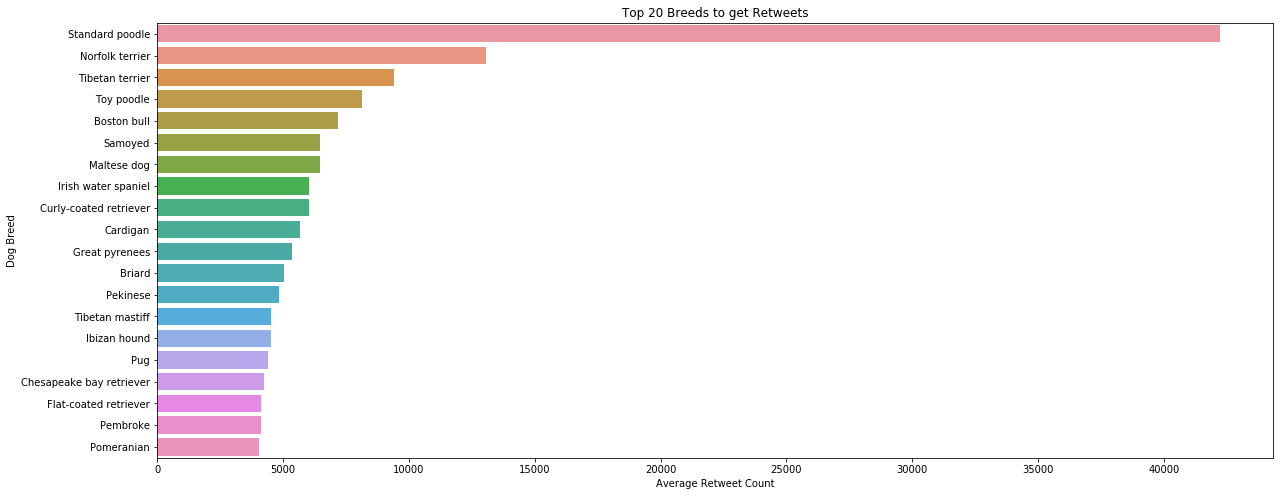

In [1059]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Dog Breed',x='Average Retweet Count',data=df6.head(20))
plt.title('Top 20 Breeds to get Retweets')

**Standard Poodle** is by far the top breed to get Retweets and favorites

<a class="anchor" id="references"></a>
## V. References


[Table of Content](#toc)


1. Data dictionary: Standard v1.1: Tweet Object
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
2. We Rate Dogs Book
https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145
3. seaborn: statistical data visualization
https://seaborn.pydata.org/index.html
4. pandas.melt
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
5. Options and settings
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
6. Stackoverflow
https://stackoverflow.com/

